# Phase - 1 :                                                                 Data Exploration 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df=pd.read_csv(r"D:\Datasets\Dataset\shopping_trends.csv")

- **Dataset is loaded using `pd.read_csv()`**

## Understanding the Data in Dataset

In [3]:
df.shape

(3900, 19)

- **The Dataset contains `3900 rows` and `19 columns`**

In [4]:
df.dtypes

Customer ID                 float64
Age                         float64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)       float64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases          float64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

- **This dataframe.dtypes tells us the about the data types of each column.**

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.0,55.0,Male,Blouse,Clothing,53.0,NaN,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,NaN,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


**This gives the first 5 columns by default and helps us to understand the data in dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3822 non-null   float64
 1   Age                       3807 non-null   float64
 2   Gender                    3794 non-null   object 
 3   Item Purchased            3807 non-null   object 
 4   Category                  3781 non-null   object 
 5   Purchase Amount (USD)     3806 non-null   float64
 6   Location                  3802 non-null   object 
 7   Size                      3801 non-null   object 
 8   Color                     3824 non-null   object 
 9   Season                    3808 non-null   object 
 10  Review Rating             3816 non-null   float64
 11  Subscription Status       3794 non-null   object 
 12  Payment Method            3797 non-null   object 
 13  Shipping Type             3795 non-null   object 
 14  Discount

- **This tells us the columns, Count, Null Values, Dtypes that are in Dataset**
- **The memory Occupied by Dataset is 558.6 KB**
- **We can know there are 14 Categorical columns and 5 Numerical columns that are present in the Dataset**

In [7]:
df.isnull().sum()

Customer ID                  78
Age                          93
Gender                      106
Item Purchased               93
Category                    119
Purchase Amount (USD)        94
Location                     98
Size                         99
Color                        76
Season                       92
Review Rating                84
Subscription Status         106
Payment Method              103
Shipping Type               105
Discount Applied             76
Promo Code Used             107
Previous Purchases           85
Preferred Payment Method    114
Frequency of Purchases       99
dtype: int64

- **This shows Null Values across All Columns**

In [8]:
round(df.isnull().sum()/len(df)*100,2)

Customer ID                 2.00
Age                         2.38
Gender                      2.72
Item Purchased              2.38
Category                    3.05
Purchase Amount (USD)       2.41
Location                    2.51
Size                        2.54
Color                       1.95
Season                      2.36
Review Rating               2.15
Subscription Status         2.72
Payment Method              2.64
Shipping Type               2.69
Discount Applied            1.95
Promo Code Used             2.74
Previous Purchases          2.18
Preferred Payment Method    2.92
Frequency of Purchases      2.54
dtype: float64

- **Dataset contains missing values across multiple columns.**
- **Customer ID, Category, Color, Payment Method, Preferred Payment Method each have 1-2% missing values.**

    - **Type of missing value: Likely Missing at Random (MAR) (customers may skip optional details).**

- **Age, Gender, Item Purchased, Purchase Amount (USD), Location, Season, etc. have 1-2% missing values.**

    - **Type of missing value: Could be MAR (depends on respondent willingness).**

- **Columns like Discount Applied, Promo Code Used, Previous Purchases, Frequency of Purchases show 1-2% missing values.**

    - **Type of missing value: Likely MCAR (missing values not related to customer characteristics).**

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3822.000000,3807.000000,3806.000000,3816.000000,3815.000000
mean,1973.419268,44.047281,59.781135,3.749240,25.397117
std,1959.530312,15.203502,23.674483,0.715798,14.421963
min,-9329.205532,18.000000,20.000000,2.500000,1.000000
25%,953.250000,31.000000,39.000000,3.100000,13.000000
50%,1944.500000,44.000000,60.000000,3.700000,25.000000
75%,2944.750000,57.000000,81.000000,4.400000,38.000000
max,13220.850651,70.000000,100.000000,5.000000,50.000000


- **This shows us statistical information like mean,count,std of each column for all numerical columns by default**

In [10]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3822.000000,3807.000000,3794,3807,3781,3806.000000,3802,3801,3824,3808,3816.000000,3794,3797,3795,3824,3793,3815.000000,3786,3801
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,California,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2581,168,1684,NaN,93,1714,177,979,NaN,2769,678,657,2180,2170,NaN,661,569
mean,1973.419268,44.047281,NaN,NaN,NaN,59.781135,NaN,NaN,NaN,NaN,3.749240,NaN,NaN,NaN,NaN,NaN,25.397117,NaN,NaN
std,1959.530312,15.203502,NaN,NaN,NaN,23.674483,NaN,NaN,NaN,NaN,0.715798,NaN,NaN,NaN,NaN,NaN,14.421963,NaN,NaN
min,-9329.205532,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,953.250000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1944.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2944.750000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


- **This also shows the statistical information for all the numerical columns and categorical columns**

## Value Counts Summary

**1. Customer ID:** 
- Unique identifier for each customer
    
**2.Age:** 
- Age of the customer
    
**3.Gender:** 
- Gender of the customer (Male/Female)
    
**4.Item Purchased:**
- The item purchased by the customer
    
**5.Category:**
- Category of the item purchased
    
**6.Purchase Amount (USD):** 
- The amount of the purchase in USD
    
**7.Location** 
- Location where the purchase was made
    
**8.Size:** 
- Size of the purchased item
    
**9.Color:** 
- Color of the purchased item
    
**10.Season:**
- Season during which the purchase was made
    
**11.Review Rating:** 
- Rating given by the customer for the purchased item
    
**12.Subscription Status:** 
- Indicates if the customer has a subscription (Yes/No)
    
**13.Shipping Type:** 
- Type of shipping chosen by the customer
    
**14.Discount Applied:**
- Indicates if a discount was applied to the purchase (Yes/No)
    
**15.Promo Code Used:** 
- Indicates if a promo code was used for the purchase (Yes/No)
    
**16.Previous Purchases:** 
- The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
    
**17.Payment Method:**
- Customer's most preferred payment method
    
**18.Frequency of Purchases:** 
- Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [11]:
df['Gender'].value_counts()

Gender
Male      2581
Female    1213
Name: count, dtype: int64

- **This describes us there are `2652 Male` and `1248 Females` in the Dataset**

In [12]:
df['Category'].value_counts()

Category
Clothing       1684
Accessories    1205
Footwear        583
Outerwear       309
Name: count, dtype: int64

- **This Column describes us various product categories that are ranked or ordered based on customer preferences, such as Clothing, Accessories, Footwear, and more.**

In [13]:
df['Season'].value_counts()

Season
Spring    979
Fall      956
Winter    945
Summer    928
Name: count, dtype: int64

- **This indicates during which seasons(Spring, Fall, Winter, Summer) the customer ordered** 

In [14]:
df['Subscription Status'].value_counts()

Subscription Status
No     2769
Yes    1025
Name: count, dtype: int64

- **This Column describes whether the customer has Subscription or Yes**
- **Total 1053 customers have Subscription**

In [15]:
df['Discount Applied'].value_counts()

Discount Applied
No     2180
Yes    1644
Name: count, dtype: int64

- **This tells whether the customer got Discount or Not**

In [16]:
df['Promo Code Used'].value_counts()

Promo Code Used
No     2170
Yes    1623
Name: count, dtype: int64

- **A promocode (or promotional code) is a series of letters, numbers, or both that customers can enter during the checkout process of an online purchase to receive a discount or special offer on their order**
- **In this dataset 1677 customers used promo code**

In [17]:
df['Payment Method'].value_counts()

Payment Method
Credit Card      678
Venmo            637
Cash             623
PayPal           623
Debit Card       620
Bank Transfer    616
Name: count, dtype: int64

- **This column tells the type of payment method that is payed using customer**

### Numerical Columns

- Age

- Purchase Amount (USD)

- Review Rating

- Previous Purchases

- Frequency of Purchases

### Categorical Columns

- Gender

- Item Purchased

- Category

- Location

- Size

- Color

- Season

- Subscription Status

- Payment Method

- Shipping Type

- Discount Applied

- Promo Code Used

- Preferred Payment Method

### Checking the Duplicates

In [18]:
df.duplicated().sum()

0

- **There are no Duplicates in the dataset**

### Detecting Outliers

- The IQR (Interquartile Range) method was used to detect outliers in all numerical columns.

#### Steps:
 - Calculate Q1 (25th percentile) and Q3 (75th percentile)
 - Compute IQR = Q3 - Q1
 - Define lower and upper bounds:
 - Lower bound = Q1 − 1.5 × IQR
 -  Upper bound = Q3 + 1.5 × IQR
 -  Any value outside this range is considered an outlier

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [20]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")


Outliers in column 'Customer ID':
[13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, -9329.205532385738, -9329.205532385738, 13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, -9329.205532385738, 13220.850651464512, -9329.205532385738, -9329.205532385738, 13220.850651464512, -9329.205532385738, 13220.850651464512, -9329.205532385738, 13220.850651464512, -9329.205532385738, -9329.205532385738, 13220.850651464512, -9329.205532385738, -9329.205532385738, 13220.850651464512, 13220.850651464512, -9329.205532385738, -9329.205532385738, -9329.205532385738, 13220.850651464512, 13220.850651464512, -9329.205532385738, 13220.850651464512, 13220.850651464512, 13220.850651464512, 13220.850651464512, -9329.205532385738, 13220.850651464512, 13220.850651464512, -9329.205532385738, 13220.850651464512, 13220.850651464512, 13220.850651464512, -9329.205532385738, -9329.205532385738, -932

# Phase 2 : Data Cleaning & Manipulation

### Handle Missing Data


In [21]:
# Identify which columns have missing or null values.
df.isnull().sum()

Customer ID                  78
Age                          93
Gender                      106
Item Purchased               93
Category                    119
Purchase Amount (USD)        94
Location                     98
Size                         99
Color                        76
Season                       92
Review Rating                84
Subscription Status         106
Payment Method              103
Shipping Type               105
Discount Applied             76
Promo Code Used             107
Previous Purchases           85
Preferred Payment Method    114
Frequency of Purchases       99
dtype: int64

In [22]:
df_copy=df.copy()

- **Making a copy of dataset before performing cleaning**

## Filling the Missing values of Numerical Columns

In [23]:
# Mean for Normally distributed data 

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

- **We used `Mean` for Age and Review Rating columns because their data is more balanced and approximately normally distributed, with fewer chances of extreme outliers.**

In [24]:
# Median for Skewed data 

df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].median(), inplace=True)
df['Previous Purchases'].fillna(df['Previous Purchases'].median(), inplace=True)

- **We used Median for Purchase Amount and Previous Purchases columns because their data is skewed and contains extreme outliers, so the median gives a better central value that is less affected by these extremes.**

## Filling the Missing values of Categorical Columns

In [25]:
categorical_columns = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
    'Subscription Status', 'Payment Method', 'Shipping Type', 
    'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 
    'Frequency of Purchases'
]


for col in categorical_columns:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_val, inplace=True)

- **We used Mode for categorical columns such as Gender, Category, Payment Method, and others because categorical data does not have a numerical average, and the mode (most frequent value) best represents the typical or common category. In cases where no clear majority exists, a placeholder like ‘Unknown’ can be used to maintain data consistency.**

In [26]:
# Filling the values for customer ID
df = df.dropna(subset=["Customer ID"])

In [27]:
df.shape

(3822, 19)

- **Rows with missing or ‘Unknown’ Customer IDs were dropped to ensure data integrity, since Customer ID is a unique identifier and cannot be null or ambiguous.**

In [28]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

- **All missing values in the dataset have been handled: numerical columns were filled using mean or median based on their distribution, categorical columns were filled with the mode, and the Customer ID column was assigned 'Unknown' where missing.**

## Remove Duplicates


In [29]:
df.duplicated().sum()

0

- **This dataset does not contain any duplicates**

## Fixing Inconsistencies in Categorical Data

- **Dataset has categorical columns (like Gender, Category, Location, Color, Subscription Status, etc.) that often suffer from inconsistencies in text data.**

In [30]:
categorical_cols = df.select_dtypes(include='object').columns

# Strip whitespace, lowercase, and unify formatting
for col in categorical_cols:
    df[col] = df[col].str.strip()          # remove extra spaces
    df[col] = df[col].str.replace(r'[^A-Za-z0-9 ]', '', regex=True)  # remove special chars
    df[col] = df[col].str.lower()          # convert to lowercase

# Example: unify Yes/No into consistent format
df['Subscription Status'] = df['Subscription Status'].replace({'yes':'Yes', 'no':'No'})
df['Discount Applied']=df['Discount Applied'].replace({'yes':'Yes', 'no':'No'})
df['Promo Code Used']=df['Promo Code Used'].replace({'yes':'Yes', 'no':'No'})

In [31]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.0,55.0,male,blouse,clothing,53.0,california,l,gray,winter,3.10000,Yes,credit card,express,Yes,Yes,14.0,venmo,fortnightly
1,2.0,19.0,male,sweater,clothing,64.0,maine,l,maroon,winter,3.10000,Yes,bank transfer,express,Yes,Yes,2.0,cash,fortnightly
2,3.0,50.0,male,jeans,clothing,73.0,massachusetts,s,maroon,spring,3.10000,Yes,cash,free shipping,Yes,Yes,23.0,credit card,weekly
3,4.0,21.0,male,sandals,footwear,90.0,rhode island,m,maroon,spring,3.74924,Yes,paypal,next day air,Yes,Yes,49.0,paypal,weekly
4,5.0,45.0,male,blouse,clothing,49.0,oregon,m,turquoise,spring,2.70000,Yes,cash,free shipping,Yes,Yes,31.0,paypal,annually


## Convert Data Types


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3822 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3822 non-null   float64
 1   Age                       3822 non-null   float64
 2   Gender                    3822 non-null   object 
 3   Item Purchased            3822 non-null   object 
 4   Category                  3822 non-null   object 
 5   Purchase Amount (USD)     3822 non-null   float64
 6   Location                  3822 non-null   object 
 7   Size                      3822 non-null   object 
 8   Color                     3822 non-null   object 
 9   Season                    3822 non-null   object 
 10  Review Rating             3822 non-null   float64
 11  Subscription Status       3822 non-null   object 
 12  Payment Method            3822 non-null   object 
 13  Shipping Type             3822 non-null   object 
 14  Discount Appl

In [33]:
# Change numerical strings to numbers (integers or floats). 
df['Customer ID']=df["Customer ID"].astype(int)
# print(df['Customer ID'].dtype)
df["Age"] = df["Age"].astype(int)
df["Purchase Amount (USD)"] = df["Purchase Amount (USD)"].astype(float)
df["Previous Purchases"] = df["Previous Purchases"].astype(int)
df["Review Rating"] = df["Review Rating"].astype(float)

In [34]:
yes_no_cols = ["Discount Applied", "Promo Code Used", "Subscription Status"]
for col in yes_no_cols:
    df[col] = df[col].astype("category")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3822 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3822 non-null   int32   
 1   Age                       3822 non-null   int32   
 2   Gender                    3822 non-null   object  
 3   Item Purchased            3822 non-null   object  
 4   Category                  3822 non-null   object  
 5   Purchase Amount (USD)     3822 non-null   float64 
 6   Location                  3822 non-null   object  
 7   Size                      3822 non-null   object  
 8   Color                     3822 non-null   object  
 9   Season                    3822 non-null   object  
 10  Review Rating             3822 non-null   float64 
 11  Subscription Status       3822 non-null   category
 12  Payment Method            3822 non-null   object  
 13  Shipping Type             3822 non-null   object  
 1

- **All columns in the dataset were converted into their appropriate data types, ensuring that numerical fields are stored as integers or floats, categorical/text fields as strings or categories for accurate analysis.**

## Non-Visual Bivariate Analysis

- **It means studying the relationship between two variables (bivariate) without using graphs (non-visual).
Instead of plots, we use tables, counts, averages, or correlation values.**

#### Categorical vs Categorical:

In [36]:
pd.crosstab(df["Gender"], df["Category"])

Category,accessories,clothing,footwear,outerwear
Gender,,,,
female,365,547,187,88
male,818,1221,382,214


- **This tells you which gender buys more from which category.**

In [37]:
pd.crosstab(df['Gender'],df['Subscription Status'])

Subscription Status,No,Yes
Gender,,
female,1187,0
male,1622,1013


#### Categorical vs Numerical:

In [38]:
df.groupby("Payment Method")["Purchase Amount (USD)"].mean()

Payment Method
bank transfer    58.902156
cash             59.843393
credit card      60.671916
debit card       58.943894
paypal           58.669394
venmo            61.567783
Name: Purchase Amount (USD), dtype: float64

- **This shows which payment method tends to have higher spending.**

#### Numerical vs Numerical:

In [39]:
df[["Age", "Purchase Amount (USD)"]].corr()

,Age,Purchase Amount (USD)
Age,1.000000,-0.009823
Purchase Amount (USD),-0.009823,1.000000


- **This tells you if age and spending are related.**

## Visualizations 

### Univariate Analysis - Numerical Columns

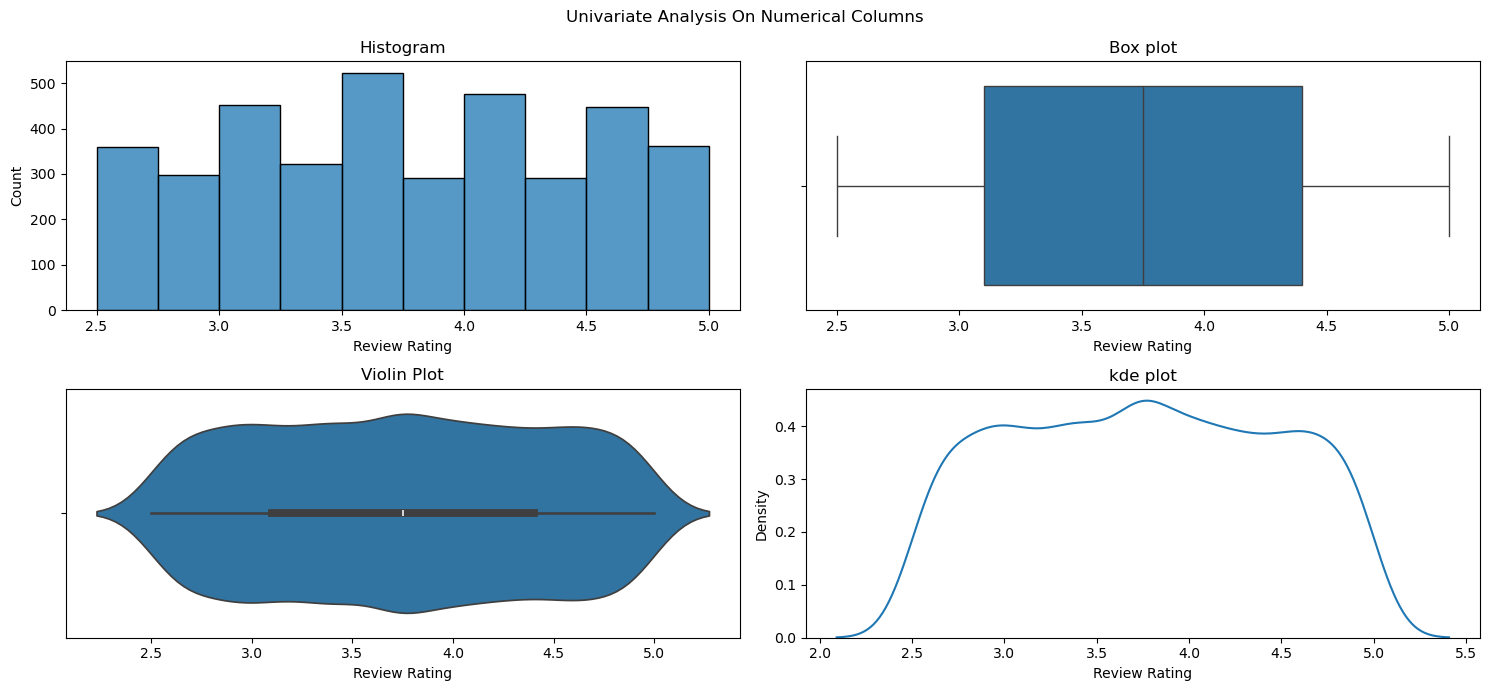

In [43]:
# Univariate Analysis on Numerical Columns
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,7))
plt.suptitle("Univariate Analysis On Numerical Columns")

sns.histplot(data=df,x='Review Rating',bins=10,ax=axs[0,0]) 
axs[0,0].set_title("Histogram")

sns.boxplot(data=df,x='Review Rating',ax=axs[0,1])
axs[0,1].set_title("Box plot")

sns.violinplot(data=df,x='Review Rating',ax=axs[1,0])
axs[1,0].set_title("Violin Plot")

sns.kdeplot(data=df,x='Review Rating',ax=axs[1,1])
axs[1,1].set_title("kde plot")

plt.tight_layout()
plt.show();

### Univariate Analysis - Categorical Columns

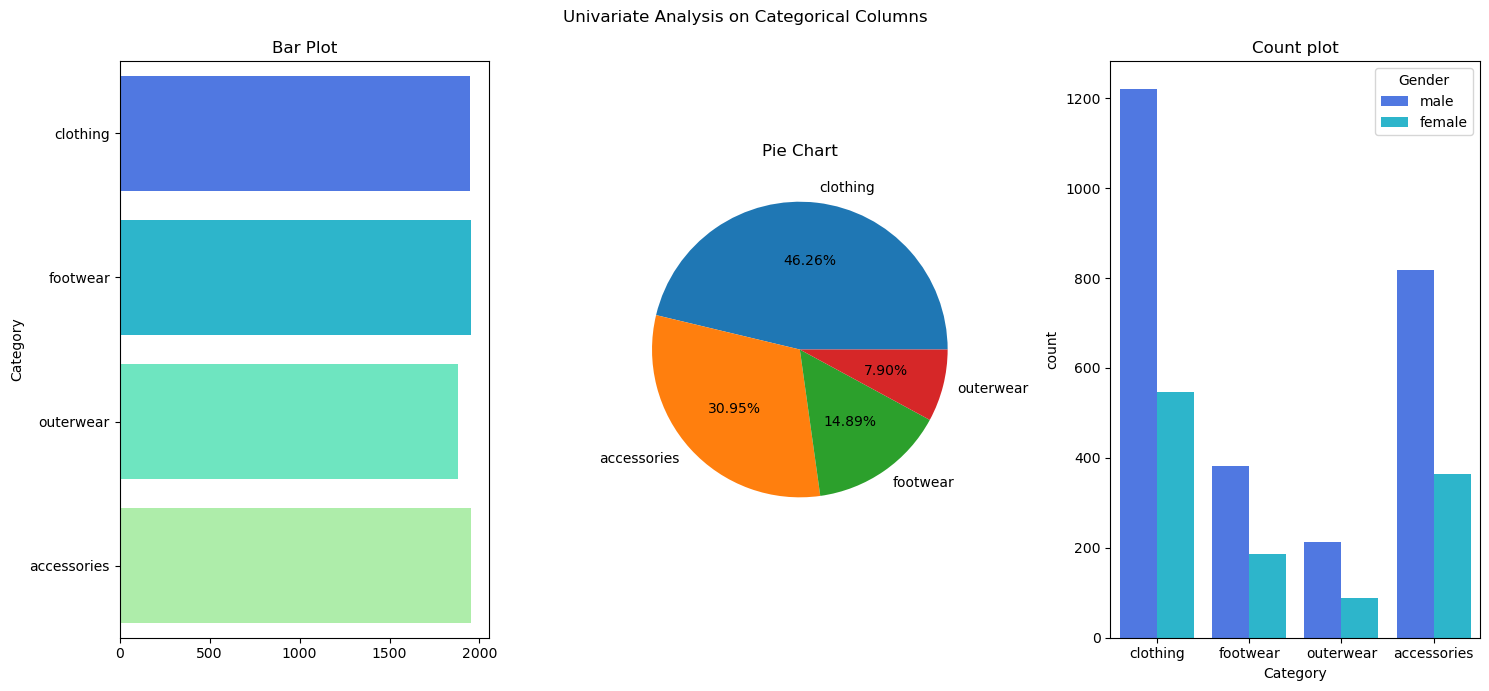

In [47]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
plt.suptitle("Univariate Analysis on Categorical Columns")

sns.barplot(df['Category'],ax=axs[0],ci=False,palette=sns.color_palette("rainbow"))
axs[0].set_title("Bar Plot")

axs[1].pie(x=df['Category'].value_counts().values,labels=df['Category'].value_counts().index,autopct="%.2f%%")
axs[1].set_title("Pie Chart")

sns.countplot(x=df['Category'],hue=df['Gender'],ax=axs[2],palette=sns.color_palette("rainbow"))
axs[2].set_title("Count plot")

plt.tight_layout()
plt.show();

### Bivariate Analysis - Categorical vs Numerical

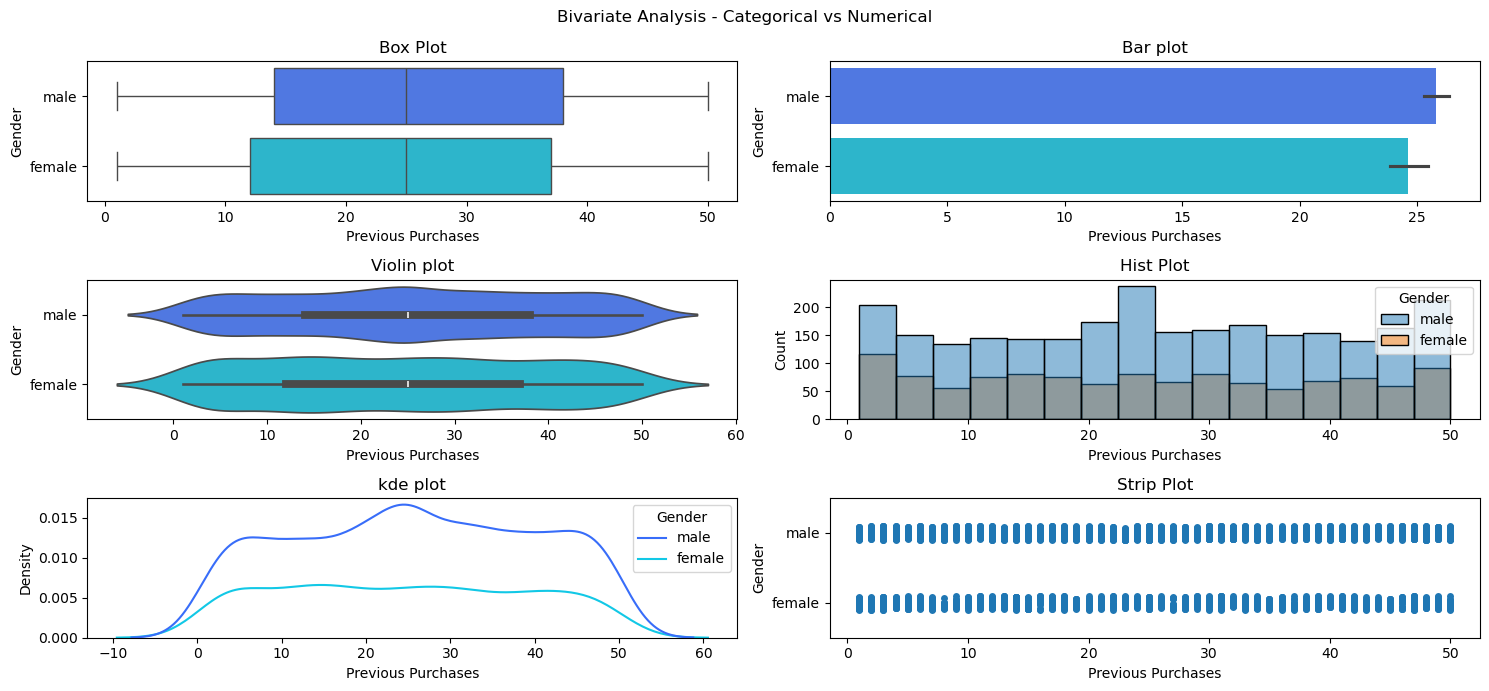

In [51]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(15,7))
plt.suptitle("Bivariate Analysis - Categorical vs Numerical")

sns.boxplot(data=df,x='Previous Purchases',y='Gender',ax=axs[0,0],palette=sns.color_palette("rainbow")) 
axs[0,0].set_title("Box Plot")

sns.barplot(data=df,x='Previous Purchases',y='Gender',ax=axs[0,1],palette=sns.color_palette("rainbow"))
axs[0,1].set_title("Bar plot")

sns.violinplot(data=df,x='Previous Purchases',y='Gender',ax=axs[1,0],palette=sns.color_palette("rainbow"))
axs[1,0].set_title("Violin plot")

sns.histplot(data=df,x='Previous Purchases',hue='Gender',ax=axs[1,1])
axs[1,1].set_title("Hist Plot")

sns.kdeplot(data=df,x='Previous Purchases',hue='Gender',ax=axs[2,0],palette=sns.color_palette("rainbow"))
axs[2,0].set_title("kde plot")

sns.stripplot(data=df,x='Previous Purchases',y='Gender',ax=axs[2,1])
axs[2,1].set_title("Strip Plot")

plt.tight_layout()
plt.show(); 

### Bivariate Analysis - Numerical vs Numerical

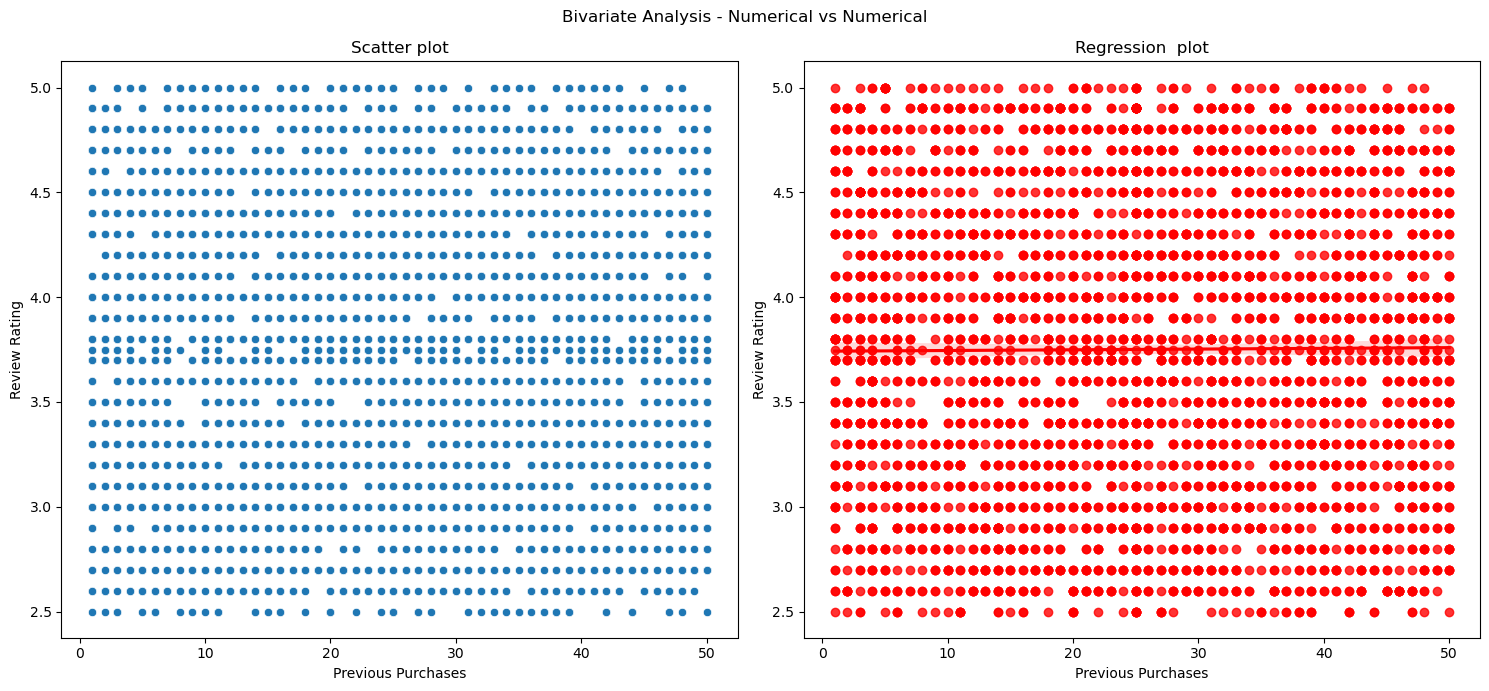

In [55]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
plt.suptitle("Bivariate Analysis - Numerical vs Numerical") 

sns.scatterplot(data=df, x = "Previous Purchases", y = "Review Rating",ax = axs[0])
axs[0].set_title("Scatter plot")

sns.regplot(data=df, x = "Previous Purchases", y = "Review Rating",ax = axs[1], color = "red")
axs[1].set_title("Regression  plot")

plt.tight_layout() 
plt.show();

### Bivariate Analysis - Categorical vs Categorical

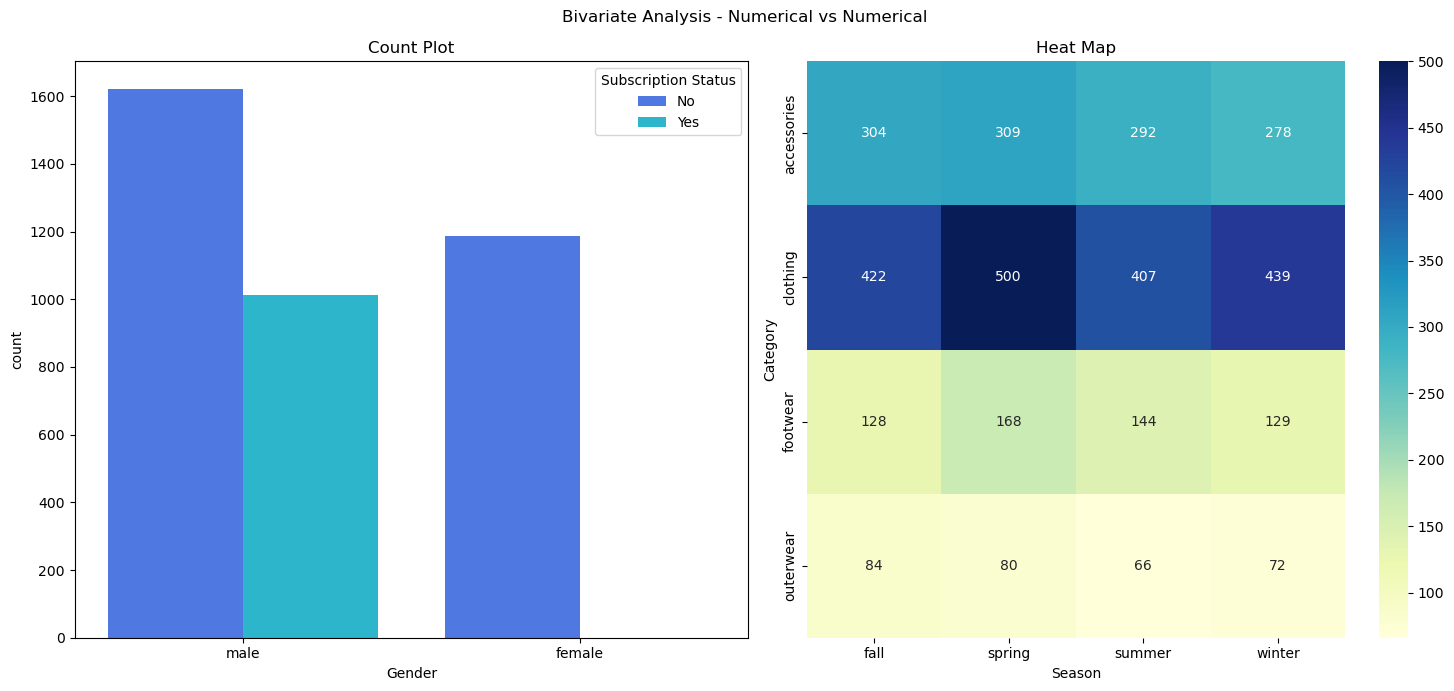

In [44]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
plt.suptitle("Bivariate Analysis - Numerical vs Numerical") 

sns.countplot(data=df,x='Gender',hue='Subscription Status',ax=axs[0],palette=sns.color_palette("rainbow"))
axs[0].set_title("Count Plot")

cross_tab = pd.crosstab(df['Category'], df['Season'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu",ax=axs[1])
axs[1].set_title("Heat Map")


plt.tight_layout()
plt.show();

### Multivariate Analysis

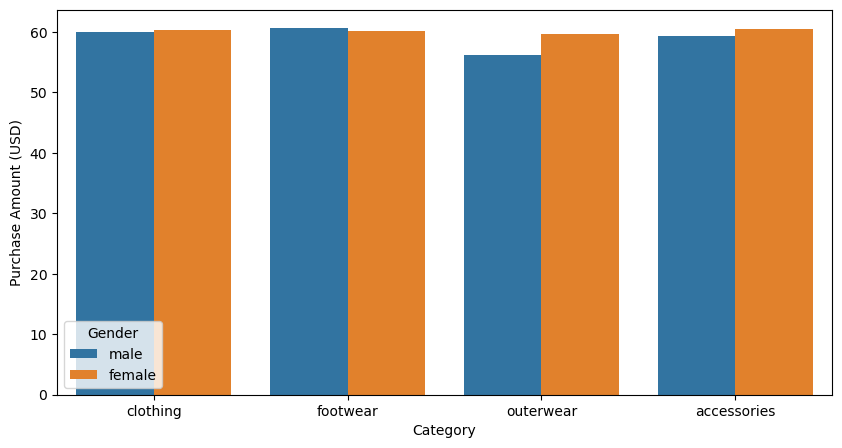

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = "Category", y = "Purchase Amount (USD)", hue = "Gender", estimator=np.mean, ci = False);

## Final Summary

#### 1. Issues found in the raw dataset

- The dataset contained missing values in some columns, which could have affected analysis accuracy.

- The Customer ID column was unique for each customer and did not provide analytical value, so it was dropped.

- Certain categorical columns like “Discount Applied” and “Promo Code Used” had inconsistent “Yes/No/No” type entries, which needed correction.

- Some columns had incorrect data types (e.g., numerical values stored as text, date fields as strings).

#### 2. Handling missing values and inconsistencies

- Missing values were identified and imputed/dropped depending on their importance.

- Inconsistencies in binary categorical fields (Yes/No type) were standardized to ensure uniformity.

- The Customer ID column was removed since it acted only as an identifier.

#### 3. Conversion of data types

- Numerical string columns (e.g., Age, Purchase Amount, Previous Purchases) were converted into integer/float formats.

- Repeated label/text fields (e.g., Gender, Category, Payment Method) were marked as categorical for easier analysis.

#### 4. Summary of bivariate relationships

- Categorical vs Categorical: Crosstab showed gender preferences across product categories, and payment method usage across groups.

- Categorical vs Numerical: Average purchase amount was compared across gender and product categories, highlighting differences in spending.

- Numerical vs Numerical: Correlation analysis showed relationships between Age, Previous Purchases, and Purchase Amount.

#### 5. Confirmation of clean dataset

- After handling missing values, correcting inconsistencies, dropping irrelevant columns, and converting data types, the dataset is now clean, consistent, and analysis-ready.

- The processed dataset can now be confidently used for exploratory data analysis (EDA), statistical testing, and predictive modeling.